# Regressão Logística

Rhenan Dias Morais - GU3009254

# Importando Dataset

In [207]:
from sklearn import datasets
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

Será utilizado o dataset "planets", inicialmente, vamos descartar as colunas que não são quantitativas.

Vamos ficar com as colunas de método, período orbital, massa e distância.

In [208]:
planetas = sns.load_dataset('planets')
planetas = planetas.drop(columns=["number"])
planetas = planetas.drop(columns=["year"])

planetas.columns

Index(['method', 'orbital_period', 'mass', 'distance'], dtype='object')

# Definindo quais valores utilizar para regressão

A regressão Logística é a técnica de classificar uma base de dados seguindo opções binárias, sim ou não, aprovado ou reprovado, método A ou método B, etc.

Para essa base de dados, podemos tentar prever qual o método de detecção de um planeta foi utilizado com base nas suas outras características de massa, período orbital, etc.

Para isso, vamos descobrir primeiro duas das técnicas de detecção mais presentes no dataset.

Abaixo, no gráfico de countplot, podemos perceber que os métodos mais presentes são os de "Radial Velocity" e "Transit", com 553 e 397 registros respectivamente.

<AxesSubplot:xlabel='method', ylabel='count'>

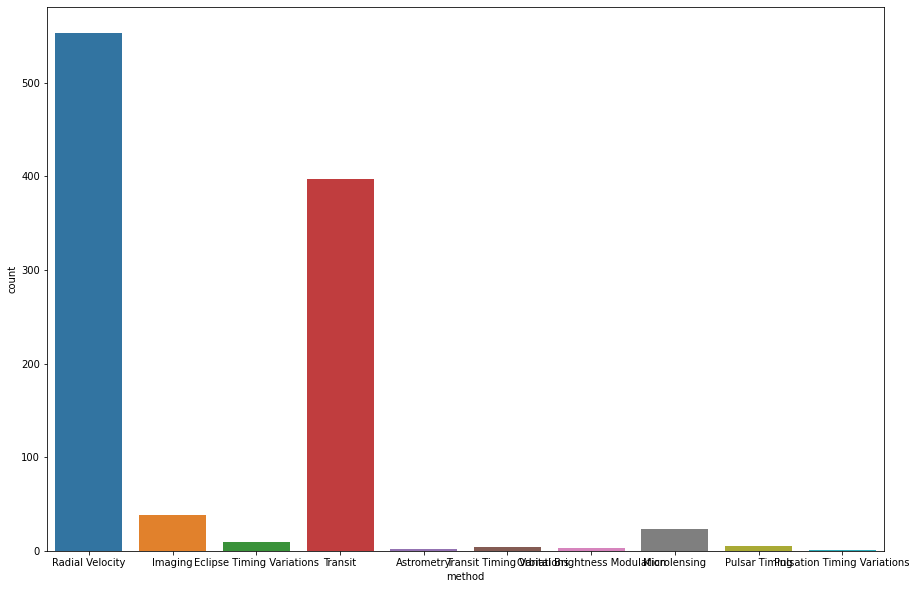

In [209]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x="method", data=planetas, ax=ax)

Vamos então filtrar nosso dataset para manter apenas os dados que possuem como método de detecção as técnicas "Radial Velocity" ou "Transit"

In [210]:
planetas = planetas[(planetas.method == "Radial Velocity") |  (planetas.method == "Transit")]

# Balanceando Dados

Agora com os dados separados apenas para os métodos de detecção interessantes para nossa análise, podemos contar a quantidade de ocorrências para um deles.

Vamos perceber que os dados não estão balanceados, ou seja, um método possui maior ocorrência que outro.

In [211]:
planetas["method"].value_counts()

Radial Velocity    553
Transit            397
Name: method, dtype: int64

<AxesSubplot:xlabel='method', ylabel='count'>

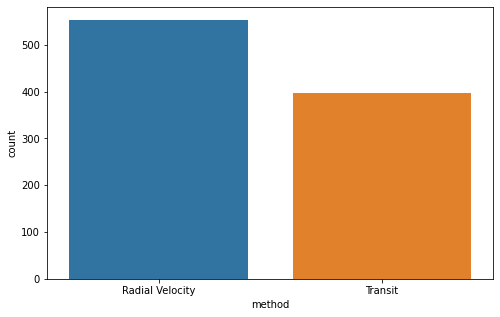

In [212]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="method", data=planetas, ax=ax)

Vamos então balancear os dados.

Para isso, contamos as quantidades de ocorrência de cada um dos métodos, e então, realizamos um "sample" do dataframe com maior quantidade, para ajustar as mesmas quantidades que o de menor quantidade.

Com esse método, os valores sobressalentes no subset com maior quantidade serão descartados até termos a mesma quantidade de valores no subset de menor quantidade.

In [213]:
transit_subset = planetas.loc[planetas["method"] == "Transit", :]
radial_velocity_subset = planetas.loc[planetas["method"] == "Radial Velocity", :]

print("Quantidade de 'Transit': ", len(transit_subset))
print("Quantidade de 'Radial Velocity': ", len(radial_velocity_subset))

sampled_radial_velocity = radial_velocity_subset.sample(len(transit_subset))

print("Quantidade balanceada de 'Radial Velocity': ", len(sampled_radial_velocity))

planetas = pd.concat([transit_subset, sampled_radial_velocity], ignore_index=True)

Quantidade de 'Transit':  397
Quantidade de 'Radial Velocity':  553
Quantidade balanceada de 'Radial Velocity':  397


Agora podemos verificar que os dados estão balanceados e com a mesma quantidade de ocorrências

<AxesSubplot:xlabel='method', ylabel='count'>

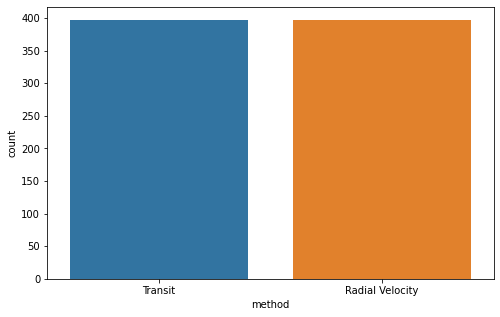

In [214]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="method", data=planetas, ax=ax)

Até agora, temos então quantidades balanceadas de ocorrências dos dois métodos que queremos classificar, e podemos prosseguir com a regressão logística.

# Preenchendo valores NaN

Antes de prosseguir com a regressão logística, vamos preencher os valores com "NaN" presentes no dataset.

Vamos utilizar uma técnica de preencher os valores faltantes com o valor médio de cada coluna

In [215]:
values = {"orbital_period": planetas["orbital_period"].median(),
          "mass": planetas["mass"].median(),
          "distance": planetas["distance"].median()}

planetas = planetas.fillna(value=values)

# Realizando Regressão Logística

Podemos então iniciar a regressão logística.

Para isso vamos seguir as etapas de:

- Definir os eixos que serão utilizados, vamos comprar a relação de período orbital, massa e distância com o eixo de método de detecção
- Separar os valores em treino e teste
- Aplicar regressão logística

In [216]:
# Definindo valores que serão utilizados
X = planetas[["orbital_period", "mass", "distance"]]
y = planetas['method']

# Separando dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Treinando o classificador
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

Agora podemos exibir os resultados em um formato de matriz de confusão.

Podemos perceber nesse resultado, a quantidade de acertos e erros do modelo gerado.

O modelo gerado apresenta um erro na predição de valores que o sistema prevê como "Transit", mas que na verdade são "Radial Velocity" (no quadro superior direito).

No quadro inferior esquerdo, são apresentados os valores que o sistema prevê como "Radial Velocity", mas que na verdade são "Transit". O modelo gerado não apresentou erro nessa detecção.

Nas colunas diagonais são os valores de acerto, em que o sistema preveu um valor que realmente era o valor predito.

<AxesSubplot:xlabel='Predito', ylabel='Atual'>

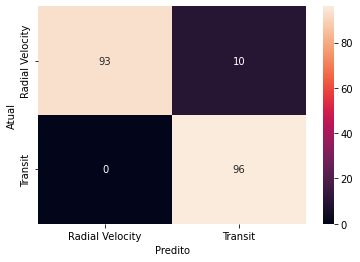

In [217]:
# Visualizando matriz de confusão
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Atual'], colnames=['Predito'])
sns.heatmap(confusion_matrix, annot=True)

Por fim, utilizamos os códigos de métricas para verificar a acurácia do modelo gerado.

É apresentado a precisão para cada um das possibilidades separadamente, e para a acurácia geral.

A acurácia geral ficou em torno de 93% a 94%, aresentando variações a cada execução, isso se deve a o fator de randomização durante a geração de dados de treinos e de testes.

In [218]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Radial Velocity       1.00      0.90      0.95       103
        Transit       0.91      1.00      0.95        96

       accuracy                           0.95       199
      macro avg       0.95      0.95      0.95       199
   weighted avg       0.95      0.95      0.95       199



In [219]:
logisticRegression = LogisticRegression()

logisticRegression.fit(X_train, y_train)

score = logisticRegression.score(X_test, y_test)

print("Acurácia geral: ", score)

Acurácia geral:  0.949748743718593
